In [1]:
#get libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


import time

In [2]:
# Load dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
!wget -q $data_url -O bank.zip
!unzip -o bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [3]:
df = pd.read_csv("bank.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
## Data Exploration and Cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


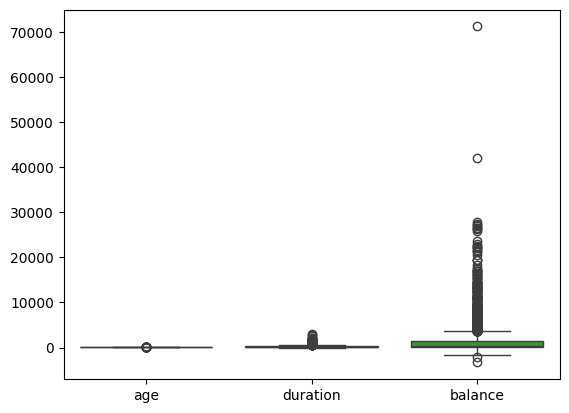

In [5]:

df.replace('unknown', pd.NA, inplace=True)
print(df.isna().sum())
# Optional: Drop rows or impute after checking counts

sns.boxplot(data=df[['age', 'duration', 'balance']])
plt.show()
# Consider capping or filtering extreme outliers if needed

df = df.drop_duplicates()

df.drop(columns='duration', inplace=True)

In [6]:

#Class Imbalance MitigationClass weighting:

LogisticRegression(class_weight='balanced')

# Label Encoding for binary target variable
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# Convert categorical variables to dummies
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y']

# X, y data
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Encode binary target
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # 'yes' → 1, 'no' → 0

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded['y'] = df['y']


In [7]:

# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:


# 	SMOTE oversampling balance
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [11]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:

## Modeling and Evaluation
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

In [14]:


results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    results[name] = {
        "CV Score": score,
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


In [15]:
# Print summary
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Cross-Validation Score: {metrics['CV Score']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['Report']).transpose())
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Model: KNN
Cross-Validation Score: 0.8872
Classification Report:
              precision    recall  f1-score      support
0              0.901538  0.972614  0.935729  1205.000000
1              0.421053  0.157895  0.229665   152.000000
accuracy       0.881356  0.881356  0.881356     0.881356
macro avg      0.661296  0.565254  0.582697  1357.000000
weighted avg   0.847718  0.881356  0.856641  1357.000000
Confusion Matrix:
[[1172   33]
 [ 128   24]]

Model: Logistic Regression
Cross-Validation Score: 0.8906
Classification Report:
              precision    recall  f1-score      support
0              0.900908  0.988382  0.942620  1205.000000
1              0.600000  0.138158  0.224599   152.000000
accuracy       0.893147  0.893147  0.893147     0.893147
macro avg      0.750454  0.563270  0.583609  1357.000000
weighted avg   0.867203  0.893147  0.862193  1357.000000
Confusion Matrix:
[[1191   14]
 [ 131   21]]

Model: Decision Tree
Cross-Validation Score: 0.8088
Classification Report:
  

In [18]:

# Tree, HyperParams & fit
# Example: A small tree to demonstrate underfitting/overfitting control
tree_overfit = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)
tree_overfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
# SCORE
train_acc = tree_overfit.score(X_train, y_train)
test_acc = tree_overfit.score(X_test, y_test)
print(f"\nDecision Tree (depth=2) Train Accuracy: {train_acc:.4f}")
print(f"Decision Tree (depth=2) Test Accuracy: {test_acc:.4f}")


Decision Tree (depth=2) Train Accuracy: 0.8916
Decision Tree (depth=2) Test Accuracy: 0.8961


In [20]:
# ROC Curve for best model (example: Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_scaled, y_train)
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

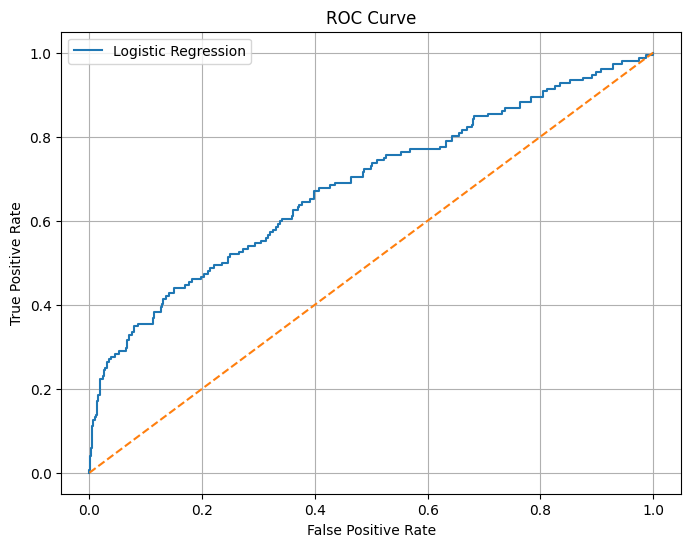

In [21]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [22]:

df = pd.get_dummies(df, drop_first=True)

print(df['y'].value_counts(normalize=True))  # Class balance
print(df.corr())

# print(df.describe())
print(df['y'].value_counts())
print(df.corr(numeric_only=True))
for col in ['job', 'education', 'marital', 'contact', 'poutcome']:
    print(df[col].value_counts())

y
0    0.88476
1    0.11524
Name: proportion, dtype: float64
                          age   balance       day  campaign     pdays  \
age                  1.000000  0.083820 -0.017853 -0.005148 -0.008894   
balance              0.083820  1.000000 -0.008677 -0.009976  0.009437   
day                 -0.017853 -0.008677  1.000000  0.160706 -0.094352   
campaign            -0.005148 -0.009976  0.160706  1.000000 -0.093137   
pdays               -0.008894  0.009437 -0.094352 -0.093137  1.000000   
previous            -0.003511  0.026196 -0.059114 -0.067833  0.577562   
y                    0.045092  0.017905 -0.011244 -0.061147  0.104087   
job_blue-collar     -0.049307 -0.057691 -0.027025  0.008783  0.009374   
job_entrepreneur     0.015638  0.014523 -0.015707 -0.012910 -0.014704   
job_housemaid        0.092979  0.035016 -0.011995 -0.015051 -0.021278   
job_management      -0.031083  0.059753  0.021510  0.030158  0.006268   
job_retired          0.453171  0.068974 -0.010072 -0.024452 -0.

KeyError: 'job'

In [23]:

for col in ['balance', 'age']:
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper, upper, df[col])

df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
df['has_prev_contact'] = (df['previous'] > 0).astype(int)

for col in ['job', 'education', 'marital', 'contact', 'poutcome']:
    df[col] = df[col].astype('category')

KeyError: 'job'

In [24]:



# Bar plot example
sns.countplot(x='job', hue='y', data=df)
plt.show()
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()



ValueError: Could not interpret value `job` for `x`. An entry with this name does not appear in `data`.